In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv(r'D:\Datasets\Big Mart Sales Prediction\train.csv') #Imported the training dataset from local.

In [2]:
print("Top 5 records :\n",df.head())           #To check top 5 records
print("\n\nSize of the training data :\n",df.shape) #To check the dimension of the training dataset

Top 5 records :
   Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium  

# Step 1 : Variable Identification

###### First, identify Predictor (Input) and Target (output) variables. Next, identify the data type and category of the variables.

### Type of Variable

##### Predictior variables:

##### Target variable:

### Data Type

##### Character:

##### Numeric

### Variable Category

##### Categorical

##### Continuous

# Step 2 : Univariate Analysis

### Continuous Variables

##### In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics and visualization methods as shown below:

In [3]:
df.describe()  #Descriptive Statistical measures helps us find measures of central tendency and measures of spread.

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##### Inference :

### Categorical Variables

#### For categorical variables, we’ll use frequency table to understand distribution of each category. 

In [4]:
char_var = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for i in char_var:
    print('\n\nThe frequency distribution of column',i,':\n\n',df[i].value_counts())





The frequency distribution of column Item_Identifier :

 FDW13    10
FDG33    10
FDX31     9
FDP25     9
NCB18     9
FDG09     9
FDD38     9
FDF56     9
NCY18     9
FDV38     9
FDQ40     9
NCQ06     9
NCF42     9
NCI54     9
DRN47     9
FDX04     9
FDU12     9
FDO19     9
FDW26     9
FDT07     9
FDF52     9
NCL31     9
DRE49     9
FDX20     9
FDV60     9
FDW49     9
NCJ30     9
FDZ21     8
NCO54     8
FDJ58     8
         ..
FDG28     2
FDM16     2
FDI36     2
DRL59     2
NCC55     2
NCW30     2
NCX53     2
FDB10     2
FDP15     2
NCW05     2
FDD22     2
FDE39     2
NCS41     2
FDU43     2
DRI59     2
FDR03     2
FDT33     2
FDU09     2
DRG25     2
FDR57     2
FDZ50     2
FDT35     1
FDC23     1
FDQ60     1
FDN52     1
FDY43     1
FDO33     1
FDE52     1
FDK57     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64


The frequency distribution of column Item_Fat_Content :

 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Cont

##### Inference :

For category 'Item_Fat_Content' , You can see that there are 2 categories basically and the cateogories LF, low fat
and Low Fat mean the same 'Low Fat'.Similary Regular and reg mean the same as 'Regular'. We will first rectify this issue

In [5]:
df['Item_Fat_Content']=df['Item_Fat_Content'].str.replace('LF','Low Fat')

In [6]:
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [7]:
df['Item_Fat_Content']=df['Item_Fat_Content'].str.replace('low fat','Low Fat')

In [8]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [9]:
df['Item_Fat_Content']=df['Item_Fat_Content'].str.replace('reg','Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### We have now manager to make the categories into two. Let's run our For loop again

In [10]:
for i in char_var:
    print('\n\nThe frequency distribution of column',i,':\n\n',df[i].value_counts())



The frequency distribution of column Item_Identifier :

 FDW13    10
FDG33    10
FDX31     9
FDP25     9
NCB18     9
FDG09     9
FDD38     9
FDF56     9
NCY18     9
FDV38     9
FDQ40     9
NCQ06     9
NCF42     9
NCI54     9
DRN47     9
FDX04     9
FDU12     9
FDO19     9
FDW26     9
FDT07     9
FDF52     9
NCL31     9
DRE49     9
FDX20     9
FDV60     9
FDW49     9
NCJ30     9
FDZ21     8
NCO54     8
FDJ58     8
         ..
FDG28     2
FDM16     2
FDI36     2
DRL59     2
NCC55     2
NCW30     2
NCX53     2
FDB10     2
FDP15     2
NCW05     2
FDD22     2
FDE39     2
NCS41     2
FDU43     2
DRI59     2
FDR03     2
FDT33     2
FDU09     2
DRG25     2
FDR57     2
FDZ50     2
FDT35     1
FDC23     1
FDQ60     1
FDN52     1
FDY43     1
FDO33     1
FDE52     1
FDK57     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64


The frequency distribution of column Item_Fat_Content :

 Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


The frequency distribution o



 AxesSubplot(0.125,0.125;0.775x0.755)


 AxesSubplot(0.125,0.125;0.775x0.755)


 AxesSubplot(0.125,0.125;0.775x0.755)


 AxesSubplot(0.125,0.125;0.775x0.755)


 AxesSubplot(0.125,0.125;0.775x0.755)


 AxesSubplot(0.125,0.125;0.775x0.755)


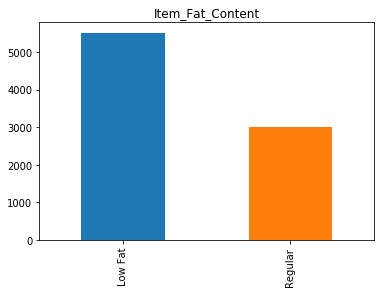

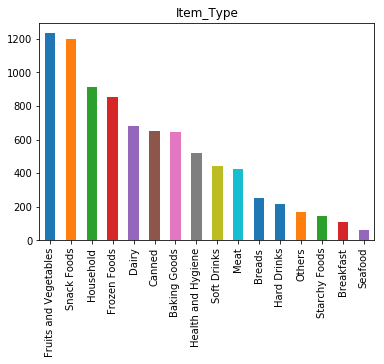

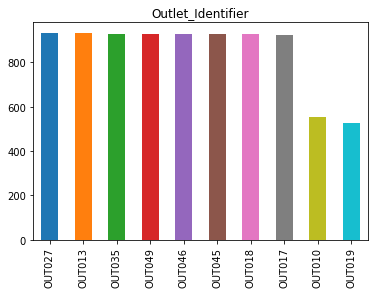

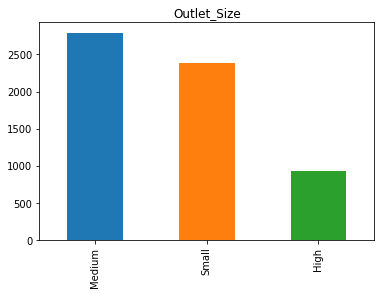

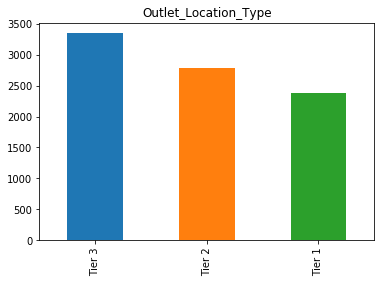

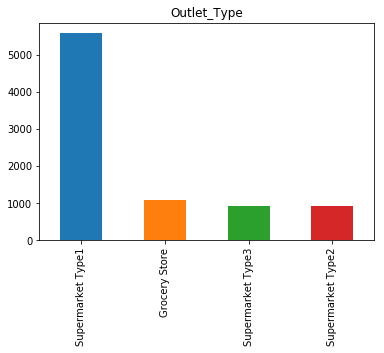

In [11]:
for i in char_var[1:]:
    plt.figure()
    plt.title(i)
    print('\n\n',df[i].value_counts().plot.bar())

#### Let's start null value treatment or Imputation

In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'),inplace=True)

In [21]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
df[df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [24]:
df['Item_Weight'].fillna(df['Item_Weight'].median(),inplace=True)

In [25]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [34]:
df.loc[df.Outlet_Type=='Grocery Store','Item_Weight'].fillna('Small',inplace=True)

In [35]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [36]:
df.loc[df.Outlet_Type=='Supermarket Type3','Item_Weight'].fillna('Medium',inplace=True)

In [37]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [38]:
df.loc[df.Outlet_Type=='Supermarket Type2','Item_Weight'].fillna('Medium',inplace=True)

In [39]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [40]:
df.loc[df.Outlet_Type=='Supermarket Type1','Item_Weight'].fillna('Medium',inplace=True)

In [41]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [44]:
df['Outlet_Size'].fillna('Medium',inplace=True) #Replacing the NA Outlet_Size with 'Medium'

In [45]:
df.isnull().sum() #No Null values present

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000152176B9EF0>,
      dtype=object)

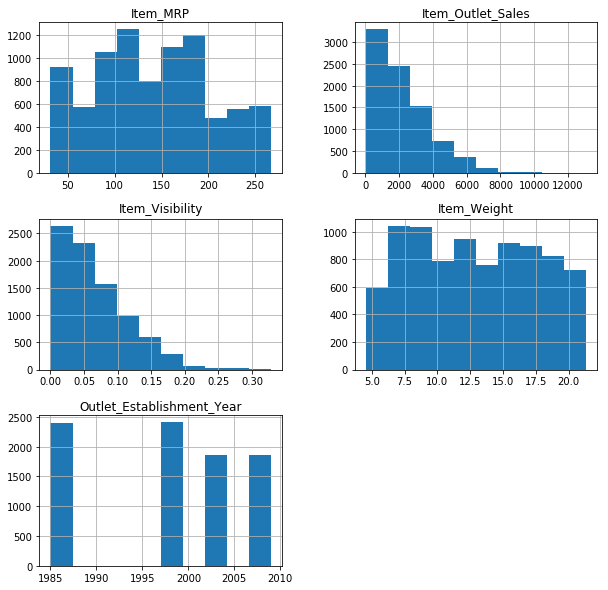

In [52]:
plt.rcParams['figure.figsize']=[10,10]
df.hist()

#### You can that the none of the numeric features are normally distributed sparing Outlet_Establishment_Year which is a categoical variable

#### Let's encode the categorical variables now

In [60]:
cat_var = ['Item_Fat_Content','Item_Visibility','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [61]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in cat_var:
    df[i]=encoder.fit_transform(df[i])

In [62]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_MRP_log
0,FDA15,9.300,0,664,4,249.8092,9,1999,1,0,1,3735.1380,15.805354
1,DRC01,5.920,1,880,14,48.2692,3,2009,1,2,2,443.4228,6.947604
2,FDN15,17.500,0,715,10,141.6180,9,1999,1,0,1,2097.2700,11.900336
3,FDX07,19.200,1,0,6,182.0950,0,1998,1,2,0,732.3800,13.494258
4,NCD19,8.930,0,0,9,53.8614,1,1987,0,2,1,994.7052,7.339033
5,FDP36,10.395,1,0,0,51.4008,3,2009,1,2,2,556.6088,7.169435
6,FDO10,13.650,1,395,13,57.6588,1,1987,0,2,1,343.5528,7.593339
7,FDP10,19.000,0,6771,13,107.7622,5,1985,1,2,3,4022.7636,10.380857
8,FDH17,16.200,1,707,5,96.9726,7,2002,1,1,1,1076.5986,9.847467
9,FDU28,19.200,1,5781,5,187.8214,2,2007,1,1,1,4710.5350,13.704795


In [66]:
x = df.iloc[:,1:11] #Matrix of Features

In [68]:
y = df.iloc[:,12]  #Dependent variable vector

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=3)

In [71]:
from sklearn.linear_model import LinearRegression as LR

In [72]:
model =LR()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [73]:
from sklearn.metrics import r2_score
print('R2 SCORE:\n',r2_score(y_pred,y_test))

R2 SCORE:
 0.982941099019024


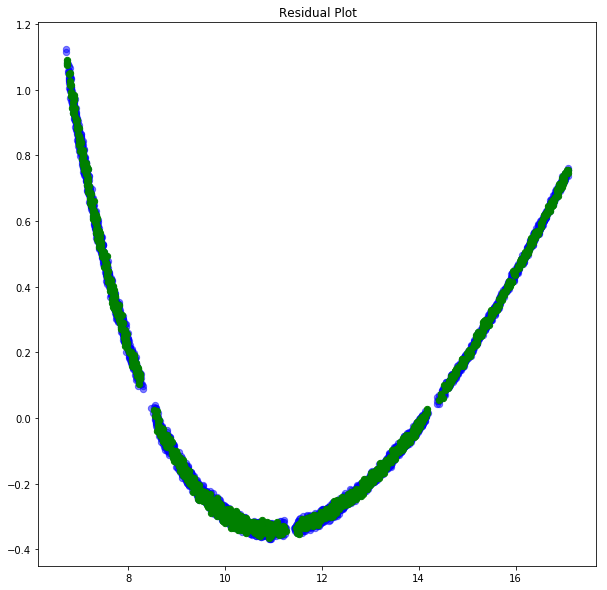

In [81]:
plt.scatter(model.predict(x_train),model.predict( x_train)- y_train, c= 'b', s=40, alpha = 0.5)
plt.scatter(model.predict(x_test), model.predict(x_test)-y_test, c='g', s=40)
plt.title('Residual Plot')
plt.show()

It is clearlt evident that we are trying to fit linear regression into a non-linear relationship. Which is worng. Let's try the same using non parametric method

R2 SCORE:
 0.9999994453377435


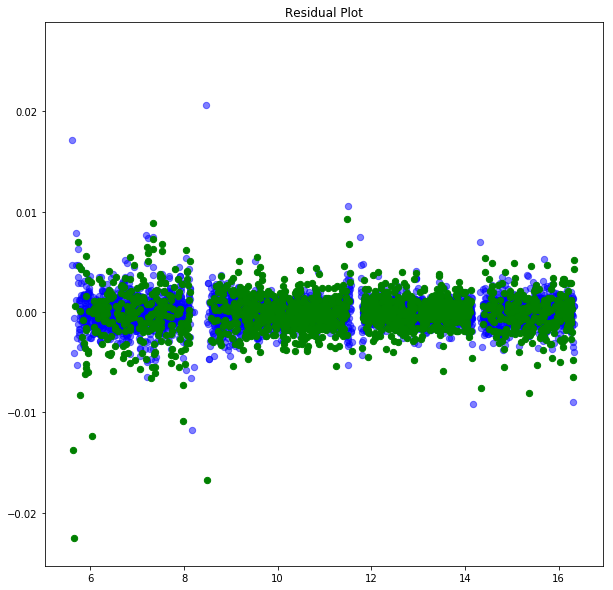

In [82]:
#Let's try the same with Random Forest regressor

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
print('R2 SCORE:\n',r2_score(y_pred,y_test))

plt.scatter(model.predict(x_train),model.predict( x_train)- y_train, c= 'b', s=40, alpha = 0.5)
plt.scatter(model.predict(x_test), model.predict(x_test)-y_test, c='g', s=40)
plt.title('Residual Plot')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
print('R2 SCORE:\n',r2_score(y_pred,y_test))

plt.scatter(model.predict(x_train),model.predict( x_train)- y_train, c= 'b', s=40, alpha = 0.5)
plt.scatter(model.predict(x_test), model.predict(x_test)-y_test, c='g', s=40)
plt.title('Residual Plot')
plt.show()

R2 SCORE:
 0.9946308749364192


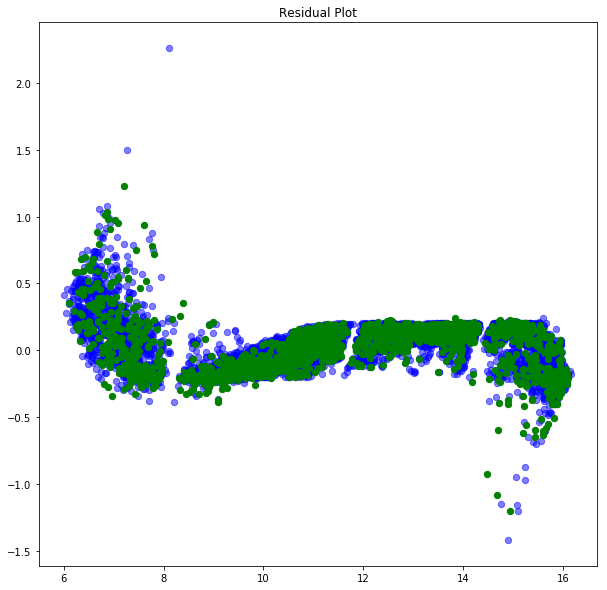

In [90]:
from sklearn.svm import SVR
model= SVR(gamma= 0.0001, C=1.0, epsilon=0.2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
print('R2 SCORE:\n',r2_score(y_pred,y_test))

plt.scatter(model.predict(x_train),model.predict(x_train)- y_train, c= 'b', s=40, alpha = 0.5)
plt.scatter(model.predict(x_test), model.predict(x_test)-y_test, c='g', s=40)
plt.title('Residual Plot')
plt.show()

#### As you can see that we got the highest accuracy in all the three algorithms but we will choose random forest/SVM as there is non-linearity present .